# Estimating Turnover in Retail Trade

### Capstone Project by Christian Furger 

## Machine Learning - RandomForest Regression

In this notebook, a RandomForest regressor is tuned. As a baseline to evaluate the model, turnover one year before is used.
The regressor is tuned once with a dataset ending 2019 (before the coronavirus pandemic) and once with data up until 2020. At the end of this notebook, a quick comparison of the RandomForest models and the baseline is done. In a final notebook (3.6), the different models are compared with each other.

In [1]:
# Import statements
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Preparation <a name="1"></a>

### 1.1 Import Data <a name="1.1"></a>

In [2]:
# Import datasets to compare the predictions
df2020_pred = pd.read_csv('df2020_pred.csv', index_col = ('OID', 'Date'), dtype = {'Stratum_Noga' : object, 'Noga_Enterprise' : object, 'Hist_Limit' : object})
df2019_pred = pd.read_csv('df2019_pred.csv', index_col = ('OID', 'Date'), dtype = {'Stratum_Noga' : object, 'Noga_Enterprise' : object, 'Hist_Limit' : object})

print('df2020_pred:', df2020_pred.shape)
print('df2019_pred:', df2019_pred.shape)

df2020_pred: (43180, 26)
df2019_pred: (37858, 26)


In [3]:
# Load the npz files 2020
with np.load('train_data_2020.npz', allow_pickle=False) as train_2020:
    train_data_2020 = dict(train_2020.items())
with np.load('train_data_rescaled_2020.npz', allow_pickle=False) as train_rescaled_2020:
    train_data_rescaled_2020 = dict(train_rescaled_2020.items())
with np.load('test_data_2020.npz', allow_pickle=False) as test_2020:
    test_data_2020 = dict(test_2020.items())
with np.load('test_data_rescaled_2020.npz', allow_pickle=False) as test_rescaled_2020:
    test_data_rescaled_2020 = dict(test_rescaled_2020.items())
    
# Create X/y arrays
X2020_tr = train_data_2020['features']
X2020_tr_rescaled = train_data_rescaled_2020['features']
y2020_tr = train_data_2020['targets']

X2020_te = test_data_2020['features']
X2020_te_rescaled = test_data_rescaled_2020['features']
y2020_te = test_data_2020['targets']

print('X2020_tr:', X2020_tr.shape)
print('X2020_tr_rescaled:', X2020_tr_rescaled.shape)
print('y2020_tr:', y2020_tr.shape)

print('X2020_te:', X2020_te.shape)
print('X2020_te_rescaled:', X2020_te_rescaled.shape)
print('y2020_te:', y2020_te.shape)

X2020_tr: (100753, 167)
X2020_tr_rescaled: (100753, 167)
y2020_tr: (100753,)
X2020_te: (43180, 167)
X2020_te_rescaled: (43180, 167)
y2020_te: (43180,)


In [4]:
# Load the npz files 2019
with np.load('train_data_2019.npz', allow_pickle=False) as train_2019:
    train_data_2019 = dict(train_2019.items())
with np.load('train_data_rescaled_2019.npz', allow_pickle=False) as train_rescaled_2019:
    train_data_rescaled_2019 = dict(train_rescaled_2019.items())
with np.load('test_data_2019.npz', allow_pickle=False) as test_2019:
    test_data_2019 = dict(test_2019.items())
with np.load('test_data_rescaled_2019.npz', allow_pickle=False) as test_rescaled_2019:
    test_data_rescaled_2019 = dict(test_rescaled_2019.items())
    
# Create X/y arrays
X2019_tr = train_data_2019['features']
X2019_tr_rescaled = train_data_rescaled_2019['features']
y2019_tr = train_data_2019['targets']

X2019_te = test_data_2019['features']
X2019_te_rescaled = test_data_rescaled_2019['features']
y2019_te = test_data_2019['targets']

print('X2019_tr:', X2019_tr.shape)
print('X2019_tr_rescaled:', X2019_tr_rescaled.shape)
print('y2019_tr:', y2019_tr.shape)

print('X2019_te:', X2019_te.shape)
print('X2019_te_rescaled:', X2019_te_rescaled.shape)
print('y2019_te:', y2019_te.shape)

X2019_tr: (88334, 165)
X2019_tr_rescaled: (88334, 165)
y2019_tr: (88334,)
X2019_te: (37858, 165)
X2019_te_rescaled: (37858, 165)
y2019_te: (37858,)


### 1.2 Create Baseline <a name="1.2"></a>

In [5]:
# Compare models with mean absolute error (MAE), mean squared error (MSE) and root mean squared error (RMSE)
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

def RMSE(y, y_pred):
    return np.sqrt(np.mean(np.square(y-y_pred)))

In [6]:
# Baseline 2020: turnover one year before
# Load the npz files
with np.load('y2020_te_baseline.npz', allow_pickle=False) as baseline_2020:
    y2020_baseline = dict(baseline_2020.items())

y2020_te_baseline = y2020_baseline['targets']    

mae_baseline2020 = MAE(np.expm1(y2020_te), np.expm1(y2020_te_baseline))
rmse_baseline2020=RMSE(np.expm1(y2020_te), np.expm1(y2020_te_baseline))
mse_baseline2020 = MSE(y2020_te, y2020_te_baseline)

print('Baseline (2020) MAE (in CHF): {:.2f}'.format(mae_baseline2020))
print('Baseline (2020) RMSE: {:.3f}'.format(rmse_baseline2020))
print('Baseline (2020) MSE: {:.3f}'.format(mse_baseline2020))

Baseline (2020) MAE (in CHF): 3145.04
Baseline (2020) RMSE: 40103.069
Baseline (2020) MSE: 15.322


In [7]:
# Baseline 2019: turnover one year before
# Load the npz files
with np.load('y2019_te_baseline.npz', allow_pickle=False) as baseline_2019:
    y2019_baseline = dict(baseline_2019.items())

y2019_te_baseline = y2019_baseline['targets']    

mae_baseline2019 = MAE(np.expm1(y2019_te), np.expm1(y2019_te_baseline))
rmse_baseline2019=RMSE(np.expm1(y2019_te), np.expm1(y2019_te_baseline))
mse_baseline2019 = MSE(y2019_te, y2019_te_baseline)

print('Baseline (2019) MAE (in CHF): {:.2f}'.format(mae_baseline2019))
print('Baseline (2019) RMSE: {:.3f}'.format(rmse_baseline2019))
print('Baseline (2019) MSE: {:.3f}'.format(mse_baseline2019))

Baseline (2019) MAE (in CHF): 2956.58
Baseline (2019) RMSE: 38434.627
Baseline (2019) MSE: 15.130


In [8]:
# Function to plot predicted vs real values
def plot_prediction(model,df,year,title):

    size=['small','medium','large']
    colors = ['red', 'green', 'blue']

    fig, axes = plt.subplots(1,len(size),figsize=(5*len(size),5))
    fig.suptitle(title+' ('+str(year)+'): Scatter plots of real vs predicted turnover (log)',fontsize=20)

    for i in range(0,3):
        size_df=df[df['Stratum_Size']==i+1]
        axes[i].scatter(np.log1p(size_df['TOV']), np.log1p(size_df['TOV_'+model]), label='', color=colors[i], s=1)
        axes[i].plot([0,14],[0,14], color='black', linewidth=1)

        #obtain a (slope) and b(intercept) of linear regression line
        a, b = np.polyfit(np.log1p(size_df['TOV']), np.log1p(size_df['TOV_'+model]), 1)
        
        # Generate a hundred values between 0 and 14
        x_values = np.linspace(0, 14, num=100)
        # Compute the associate y values
        y_values = a*x_values + b
        
        #add linear regression line to scatterplot          
        axes[i].plot(x_values, y_values, color=colors[i], label='slope: {:.2f}'.format(a))
           
        axes[i].set_title(size[i])
        axes[i].set_xlabel('real')
        axes[i].set_ylabel('predicted')
        axes[i].legend()

    plt.show()

## 2. Model fitting <a name="2"></a>

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Create a RandomForest pipeline
rf_estimator = Pipeline([
    ('pca', PCA()),
    ('rf', RandomForestRegressor())
])

# Use the random grid to search for best hyperparameters
# Number of components for PCA
n_components = [2, 5, 10, 20, 50, 100]
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'pca__n_components': n_components,
               'rf__n_estimators': n_estimators,
               'rf__max_features': max_features,
               'rf__max_depth': max_depth,
               'rf__min_samples_split': min_samples_split,
               'rf__min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'pca__n_components': [2, 5, 10, 20, 50, 100],
 'rf__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'rf__max_features': ['auto', 'sqrt'],
 'rf__min_samples_leaf': [1, 2, 4],
 'rf__min_samples_split': [2, 5, 10],
 'rf__n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


Grid search with the whole dataset throws a memory error, therefore, a sample of 10000 entries (~10%) of the train data is taken to find the optimal parameters. The final model is then estimated using the whole dataset.

In [10]:
# Take a sample of 10000 entries (~10%) of the train data to speed up the process of tree building
np.random.seed(42)

idx20 = np.random.choice(np.arange(len(X2020_tr)), 10000, replace=False)
X2020_sample = X2020_tr[idx20]
y2020_sample = y2020_tr[idx20]
print('X2020_sample:',X2020_sample.shape)
print('y2020_sample:',y2020_sample.shape)

idx19 = np.random.choice(np.arange(len(X2019_tr)), 10000, replace=False)
X2019_sample = X2019_tr[idx19]
y2019_sample = y2019_tr[idx19]
print('X2019_sample:',X2019_sample.shape)
print('y2019_sample:',y2019_sample.shape)

X2020_sample: (10000, 167)
y2020_sample: (10000,)
X2019_sample: (10000, 165)
y2019_sample: (10000,)


### 2.1 Dataset ending 2020 <a name="2.1"></a>

First, let's try to find the optimal parameters of a model with PCA with a random search over a grid of values.

In [11]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random_2020 = RandomizedSearchCV(estimator = rf_estimator, param_distributions = random_grid, n_iter = 100, cv = 5, return_train_score=True, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random_2020.fit(X2020_sample, y2020_sample)

rf_random_2020.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 50.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 69.3min finished


{'rf__n_estimators': 700,
 'rf__min_samples_split': 2,
 'rf__min_samples_leaf': 2,
 'rf__max_features': 'auto',
 'rf__max_depth': 20,
 'pca__n_components': 100}

In [12]:
# Collect results in a DataFrame
rf_rand_2020 = pd.DataFrame({
    'comp': rf_random_2020.cv_results_['param_pca__n_components'],
    'trees': rf_random_2020.cv_results_['param_rf__n_estimators'],
    'max_features': rf_random_2020.cv_results_['param_rf__max_features'],
    'max_depth': rf_random_2020.cv_results_['param_rf__max_depth'],
    'min_samples_split': rf_random_2020.cv_results_['param_rf__min_samples_split'],
    'min_samples_leaf': rf_random_2020.cv_results_['param_rf__min_samples_leaf'],
    'mean_tr': rf_random_2020.cv_results_['mean_train_score'],
    'mean_te': rf_random_2020.cv_results_['mean_test_score'],
    'std_te': rf_random_2020.cv_results_['std_test_score']
})

# Ten best combinations according to the mean "test" score
# i.e. the mean score on the 5 validation folds
rf_rand_2020.sort_values(by='mean_te', ascending=False).head(10)

,comp,trees,max_features,max_depth,min_samples_split,min_samples_leaf,mean_tr,mean_te,std_te
57,100,700,auto,20,2,2,0.983152,0.928974,0.009208
51,50,800,auto,None,2,1,0.989724,0.928747,0.009438
97,20,400,auto,30,10,1,0.979622,0.928745,0.008421
26,100,1000,auto,90,2,4,0.972189,0.928744,0.010249
14,20,300,auto,110,5,2,0.979191,0.928695,0.008979
82,20,400,auto,30,2,2,0.980619,0.928603,0.009268
71,50,800,auto,90,2,4,0.970738,0.928539,0.010302
61,50,600,auto,60,5,1,0.986017,0.928515,0.009187
99,20,1000,auto,None,2,4,0.968122,0.928478,0.010143
48,50,900,auto,20,5,1,0.986067,0.928478,0.009513


Then, we tune a second RandomForest Estimator without PCA.

In [13]:
### Second RandomForestRegressor without PCA

rf_estimator2 = Pipeline([
    ('rf', RandomForestRegressor())
])

# Use the random grid to search for best hyperparameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid2 = {'rf__n_estimators': n_estimators,
               'rf__max_features': max_features,
               'rf__max_depth': max_depth,
               'rf__min_samples_split': min_samples_split,
               'rf__min_samples_leaf': min_samples_leaf}
pprint(random_grid2)

{'rf__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'rf__max_features': ['auto', 'sqrt'],
 'rf__min_samples_leaf': [1, 2, 4],
 'rf__min_samples_split': [2, 5, 10],
 'rf__n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [14]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random2_2020 = RandomizedSearchCV(estimator = rf_estimator2, param_distributions = random_grid2, n_iter = 100, cv = 5, return_train_score=True, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random2_2020.fit(X2020_sample, y2020_sample)

rf_random2_2020.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 44.1min finished


{'rf__n_estimators': 200,
 'rf__min_samples_split': 5,
 'rf__min_samples_leaf': 4,
 'rf__max_features': 'auto',
 'rf__max_depth': 80}

In [15]:
# Collect results in a DataFrame
rf_rand2_2020 = pd.DataFrame({
    'trees': rf_random2_2020.cv_results_['param_rf__n_estimators'],
    'max_features': rf_random2_2020.cv_results_['param_rf__max_features'],
    'max_depth': rf_random2_2020.cv_results_['param_rf__max_depth'],
    'min_samples_split': rf_random2_2020.cv_results_['param_rf__min_samples_split'],
    'min_samples_leaf': rf_random2_2020.cv_results_['param_rf__min_samples_leaf'],
    'mean_tr': rf_random2_2020.cv_results_['mean_train_score'],
    'mean_te': rf_random2_2020.cv_results_['mean_test_score'],
    'std_te': rf_random2_2020.cv_results_['std_test_score']
})

# Ten best combinations according to the mean "test" score
# i.e. the mean score on the 5 validation folds
rf_rand2_2020.sort_values(by='mean_te', ascending=False).head(10)

,trees,max_features,max_depth,min_samples_split,min_samples_leaf,mean_tr,mean_te,std_te
40,200,auto,80,5,4,0.970612,0.934965,0.008314
67,700,auto,90,2,4,0.970682,0.934878,0.008278
29,600,auto,60,2,4,0.970702,0.934823,0.008051
61,900,auto,20,2,1,0.990947,0.934725,0.008223
68,900,auto,110,2,4,0.970645,0.934723,0.008257
4,900,auto,50,2,4,0.970695,0.934716,0.008335
13,500,auto,70,10,4,0.968788,0.934701,0.008066
38,300,auto,30,2,4,0.970609,0.934683,0.008043
27,200,auto,20,5,4,0.970595,0.934624,0.008051
74,800,auto,80,5,4,0.970645,0.934617,0.008263


The estimator without PCA seems to give slightly better results. Let's finetune this estimator with grid search, still using only a sample of the data.

In [16]:
# Finetuning RandomForest Estimator with grid search
grid2020 = {
    'rf__n_estimators': [200, 300, 400, 500],  
    'rf__max_features': ['auto'],    
    'rf__max_depth': [60, 70, 80, 90, None],
    'rf__min_samples_split': [5],
    'rf__min_samples_leaf': [4]
}

rf_grid_cv2020 = GridSearchCV(rf_estimator2, grid2020, cv=5, refit=True, return_train_score=True, verbose=2, n_jobs = -1)

# Fit RandomForest estimator
rf_grid_cv2020.fit(X2020_sample, y2020_sample)

# Collect results in a DataFrame
rf_grid_2020 = pd.DataFrame({
    'trees': rf_grid_cv2020.cv_results_['param_rf__n_estimators'],
    'max_features': rf_grid_cv2020.cv_results_['param_rf__max_features'],
    'max_depth': rf_grid_cv2020.cv_results_['param_rf__max_depth'],
    'min_samples_split': rf_grid_cv2020.cv_results_['param_rf__min_samples_split'],
    'min_samples_leaf': rf_grid_cv2020.cv_results_['param_rf__min_samples_leaf'],
    'mean_tr': rf_grid_cv2020.cv_results_['mean_train_score'],
    'mean_te': rf_grid_cv2020.cv_results_['mean_test_score'],
    'std_te': rf_grid_cv2020.cv_results_['std_test_score']
})


# Ten best combinations according to the mean "test" score
# i.e. the mean score on the 5 validation folds
rf_grid_2020.sort_values(by='mean_te', ascending=False).head(10)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  9.5min finished


,trees,max_features,max_depth,min_samples_split,min_samples_leaf,mean_tr,mean_te,std_te
1,300,auto,60,5,4,0.970687,0.935118,0.008409
13,300,auto,90,5,4,0.970736,0.935059,0.008137
14,400,auto,90,5,4,0.970603,0.934975,0.007991
0,200,auto,60,5,4,0.970764,0.934945,0.008665
15,500,auto,90,5,4,0.970735,0.934932,0.008257
5,300,auto,70,5,4,0.970658,0.934912,0.008254
3,500,auto,60,5,4,0.970713,0.934897,0.008158
9,300,auto,80,5,4,0.970691,0.934810,0.008041
6,400,auto,70,5,4,0.970667,0.934743,0.007889
10,400,auto,80,5,4,0.970609,0.934728,0.008335


In [17]:
# Show best estimator
rf_grid_cv2020.best_estimator_

Pipeline(steps=[('rf',
                 RandomForestRegressor(max_depth=60, min_samples_leaf=4,
                                       min_samples_split=5,
                                       n_estimators=300))])

In [18]:
# Modify best estimator
final_rf_pipe_2020=rf_grid_cv2020.best_estimator_
final_rf_pipe_2020.set_params(rf__n_jobs=-1)

Pipeline(steps=[('rf',
                 RandomForestRegressor(max_depth=60, min_samples_leaf=4,
                                       min_samples_split=5, n_estimators=300,
                                       n_jobs=-1))])

Let's fit a RandomForest regression on the whole dataset, calculate the predictions for the test set and calculate the model accuracy.

In [19]:
# Create and fit RandomForest regression
rf2020 = final_rf_pipe_2020
rf2020.fit(X2020_tr, y2020_tr)

# Calculate predictions
y_pred_rf2020 = rf2020.predict(X2020_te) # Predictions for test data

# Calculate model accuracy
mae_rf2020 = MAE(np.expm1(y2020_te), np.expm1(y_pred_rf2020))
rmse_rf2020=RMSE(np.expm1(y2020_te), np.expm1(y_pred_rf2020))
mse_rf2020 = MSE(y2020_te, y_pred_rf2020)

# Export model accuracy
rf2020=pd.DataFrame([['RandomForest', '{:.3f}'.format(mae_rf2020), '{:.3f}'.format(rmse_rf2020), '{:.3f}'.format(mse_rf2020)]],
                 columns=['Model', 'MAE', 'RMSE', 'MSE'])
rf2020.to_csv("rf2020.csv", encoding='utf-8', index=False)
rf2020.head()

,Model,MAE,RMSE,MSE
0,RandomForest,233.630,2179.861,0.161


In [20]:
# Add prediction to dataset
df2020_pred['TOV_rf'] = np.expm1(y_pred_rf2020).tolist()

### 2.2 Dataset ending 2019 <a name="2.2"></a>

For the dataset ending 2019, let's try to find the optimal parameters of a model without PCA with a random search over a grid of values, using a sample of 10000 entries.

In [21]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random_2019 = RandomizedSearchCV(estimator = rf_estimator2, param_distributions = random_grid2, n_iter = 100, cv = 5, return_train_score=True, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random_2019.fit(X2019_sample, y2019_sample)

rf_random_2019.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 43.1min finished


{'rf__n_estimators': 200,
 'rf__min_samples_split': 2,
 'rf__min_samples_leaf': 1,
 'rf__max_features': 'auto',
 'rf__max_depth': 30}

In [22]:
# Collect results in a DataFrame
rf_random_cv2019 = pd.DataFrame({
    'trees': rf_random_2019.cv_results_['param_rf__n_estimators'],
    'max_features': rf_random_2019.cv_results_['param_rf__max_features'],
    'max_depth': rf_random_2019.cv_results_['param_rf__max_depth'],
    'min_samples_split': rf_random_2019.cv_results_['param_rf__min_samples_split'],
    'min_samples_leaf': rf_random_2019.cv_results_['param_rf__min_samples_leaf'],
    'mean_tr': rf_random_2019.cv_results_['mean_train_score'],
    'mean_te': rf_random_2019.cv_results_['mean_test_score'],
    'std_te': rf_random_2019.cv_results_['std_test_score']
})

# Ten best combinations according to the mean "test" score
# i.e. the mean score on the 5 validation folds
rf_random_cv2019.sort_values(by='mean_te', ascending=False).head(10)

,trees,max_features,max_depth,min_samples_split,min_samples_leaf,mean_tr,mean_te,std_te
57,200,auto,30,2,1,0.992580,0.948896,0.010611
37,300,auto,None,5,2,0.983985,0.948811,0.010307
36,800,auto,100,5,2,0.983978,0.948752,0.010453
22,600,auto,90,5,1,0.988749,0.948724,0.010385
61,900,auto,20,2,1,0.992495,0.948712,0.010488
18,600,auto,110,5,2,0.983975,0.948693,0.010544
72,500,auto,40,2,1,0.992647,0.948661,0.010346
16,1000,auto,10,10,1,0.976658,0.948652,0.009927
31,300,auto,None,10,1,0.983843,0.948608,0.009799
97,800,auto,30,2,1,0.992756,0.948604,0.010675


Now, let's finetune the parameters of the model, still using only a sample of the data.

In [23]:
# Create a second cross-validation object for fine-tuning
grid2019 = {
    'rf__n_estimators': [100, 200, 300, 600, 700],  
    'rf__max_features': ['auto'],    
    'rf__max_depth': [100, 110, None],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2]
}
rf_grid_cv2019 = GridSearchCV(rf_estimator2, grid2019, cv=5, refit=True, return_train_score=True, verbose=2, n_jobs = -1)

# Fit RandomForest estimator
rf_grid_cv2019.fit(X2019_sample, y2019_sample)

# Collect results in a DataFrame
rf_grid_2019 = pd.DataFrame({
    'trees': rf_grid_cv2019.cv_results_['param_rf__n_estimators'],
    'max_features': rf_grid_cv2019.cv_results_['param_rf__max_features'],
    'max_depth': rf_grid_cv2019.cv_results_['param_rf__max_depth'],
    'min_samples_split': rf_grid_cv2019.cv_results_['param_rf__min_samples_split'],
    'min_samples_leaf': rf_grid_cv2019.cv_results_['param_rf__min_samples_leaf'],
    'mean_tr': rf_grid_cv2019.cv_results_['mean_train_score'],
    'mean_te': rf_grid_cv2019.cv_results_['mean_test_score'],
    'std_te': rf_grid_cv2019.cv_results_['std_test_score']
})


# Ten best combinations according to the mean "test" score
# i.e. the mean score on the 5 validation folds
rf_grid_2019.sort_values(by='mean_te', ascending=False).head(10)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 36.3min finished


,trees,max_features,max_depth,min_samples_split,min_samples_leaf,mean_tr,mean_te,std_te
18,600,auto,100,5,2,0.984068,0.948919,0.010299
20,100,auto,110,2,1,0.992511,0.948898,0.010474
5,100,auto,100,5,1,0.988383,0.948884,0.010172
27,300,auto,110,5,1,0.988641,0.948882,0.010386
14,700,auto,100,2,2,0.985406,0.948859,0.010178
12,300,auto,100,2,2,0.985449,0.948854,0.010473
31,200,auto,110,2,2,0.985365,0.948826,0.010825
49,700,auto,None,5,1,0.988680,0.948755,0.010257
13,600,auto,100,2,2,0.985365,0.948754,0.010527
39,700,auto,110,5,2,0.984082,0.948750,0.010464


In [24]:
# Show best estimator
rf_grid_cv2019.best_estimator_

Pipeline(steps=[('rf',
                 RandomForestRegressor(max_depth=100, min_samples_leaf=2,
                                       min_samples_split=5,
                                       n_estimators=600))])

In [25]:
# Modify best estimator
final_rf_pipe_2019=rf_grid_cv2019.best_estimator_
final_rf_pipe_2019.set_params(rf__n_jobs=-1)

Pipeline(steps=[('rf',
                 RandomForestRegressor(max_depth=100, min_samples_leaf=2,
                                       min_samples_split=5, n_estimators=600,
                                       n_jobs=-1))])

Let's fit a RandomForest regression on the whole dataset, calculate the predictions for the test set and calculate the model accuracy.

In [26]:
# Create and fit final RandomForestRegressor
rf2019 = final_rf_pipe_2019
rf2019.fit(X2019_tr, y2019_tr)

rf2019.fit(X2019_tr, y2019_tr)

# Calculate predictions
y_pred_rf2019 = rf2019.predict(X2019_te) # Predictions for test data

# Calculate model accuracy
mae_rf2019 = MAE(np.expm1(y2019_te), np.expm1(y_pred_rf2019))
rmse_rf2019=RMSE(np.expm1(y2019_te), np.expm1(y_pred_rf2019))
mse_rf2019 = MSE(y2019_te, y_pred_rf2019)

# Export model accuracy
rf2019=pd.DataFrame([['RandomForest', '{:.3f}'.format(mae_rf2019), '{:.3f}'.format(rmse_rf2019), '{:.3f}'.format(mse_rf2019)]],
                 columns=['Model', 'MAE', 'RMSE', 'MSE'])
rf2019.to_csv("rf2019.csv", encoding='utf-8', index=False)
rf2019.head()

,Model,MAE,RMSE,MSE
0,RandomForest,195.935,1974.344,0.129


In [27]:
# Add prediction to dataset
df2019_pred['TOV_rf'] = np.expm1(y_pred_rf2019).tolist()

### 2.3 Model comparison <a name="2.3"></a>

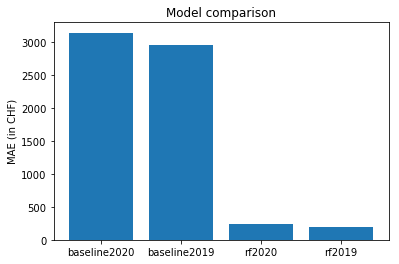

In [28]:
# Comparison
mae_values = [mae_baseline2020, mae_baseline2019, mae_rf2020, mae_rf2019]
titles = ['baseline2020', 'baseline2019', 'rf2020', 'rf2019']

xcor = np.arange(len(mae_values))
plt.bar(xcor, mae_values)
plt.xticks(xcor, titles)
plt.title('Model comparison')
plt.ylabel('MAE (in CHF)')
plt.show()

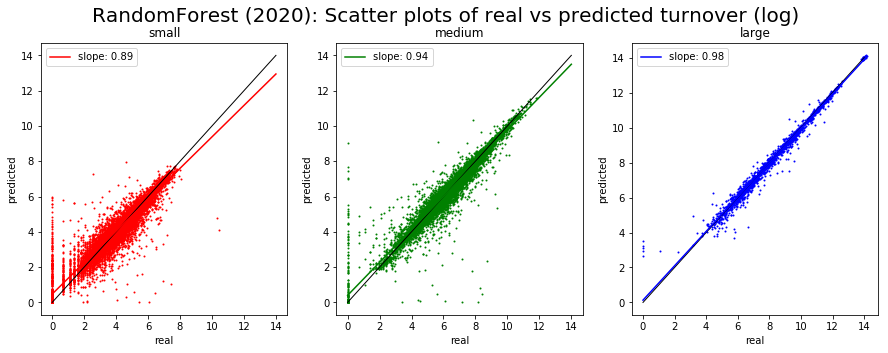

In [29]:
plot_prediction('rf',df2020_pred,2020,'RandomForest')

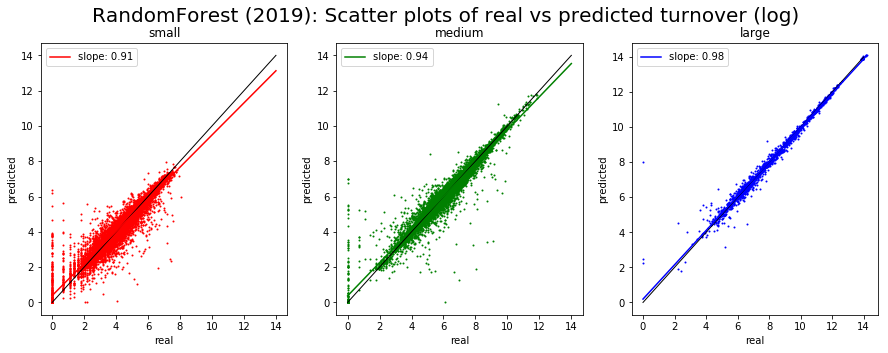

In [30]:
plot_prediction('rf',df2019_pred,2019,'RandomForest')

In [31]:
# Exporting datasets with predictions
df2020_pred.to_csv("df2020_pred.csv", encoding='utf-8', index=True)
df2019_pred.to_csv("df2019_pred.csv", encoding='utf-8', index=True)

The RandomForest regression seems to give the best results so far, especially for the large enterprises. The model seems to be less able to predict turnover of 0. This might be due to the log1p transformation. The model with data only until 2019 gives only slightly better results than the model using all the data, so the model seems to capture well the effects of the coronavirus pandemic. 